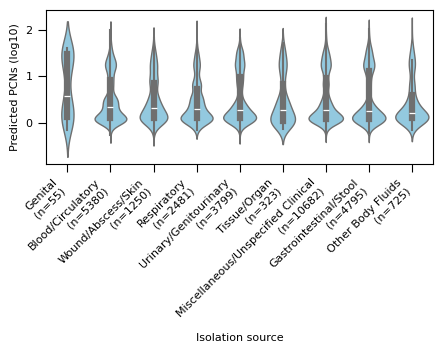

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde  

# Load data
plot_df = pd.read_csv('Figure_4_data.csv')

# Apply log10 transformation
plot_df['Log10_Predicted_PCN_backtransformed'] = np.log10(plot_df['Predicted_PCN_backtransformed'])  

# Filter groups with >3 samples
group_counts = plot_df.groupby('Group')['Log10_Predicted_PCN_backtransformed'].count()
valid_groups = group_counts[group_counts > 3].index
filtered_df = plot_df[plot_df['Group'].isin(valid_groups)]

# Median for sorting
group_medians = filtered_df.groupby('Group')['Log10_Predicted_PCN_backtransformed'].median()
sorted_groups = group_medians.sort_values(ascending=False).index.tolist()

# Create mapping from Group to Group + (n=...)
group_n = filtered_df['Group'].value_counts()
group_label_map = {grp: f"{grp}\n(n={group_n[grp]})" for grp in sorted_groups}

# Add a column with labels
filtered_df['Group_Label'] = filtered_df['Group'].map(group_label_map)

# Plot
plt.figure(figsize=(5, 2))
sns.violinplot(
    x='Group_Label', 
    y='Log10_Predicted_PCN_backtransformed', 
    data=filtered_df, 
    order=[group_label_map[g] for g in sorted_groups],
    inner="box", 
    linewidth=1, 
    color='skyblue'
)

plt.xlabel('Isolation source', fontsize=8)
plt.ylabel('Predicted PCNs (log10)', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tick_params(axis='x', length=6)
plt.tick_params(axis='y', length=6)
plt.grid(False)

# Save

plt.savefig('Figure_4B.pdf', bbox_inches='tight')

plt.show()
